<a href="https://colab.research.google.com/github/pandupuncak/Notebooks/blob/main/LaSTI_Basic_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initializing Notebook

In [ ]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import glob
#print('glob: {}'.format(glob.__version__))
import os

import io

import json

import pickle

Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 1.0.1


In [ ]:
from google.colab import files
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from re import sub
from pathlib import Path
from decimal import Decimal

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d PromptCloudHQ/innerwear-data-from-victorias-secret-and-others
! unzip innerwear-data-from-victorias-secret-and-others

innerwear-data-from-victorias-secret-and-others.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  innerwear-data-from-victorias-secret-and-others.zip
replace ae_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Data Processing (Predicting Locations)

In [ ]:
path = r'./' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))
all_files[:5]

['./shop_nordstrom_com.csv',
 './calvinklein_com.csv',
 './amazon_com.csv',
 './btemptd_com.csv',
 './us_topshop_com.csv']

In [ ]:
# Load dataset_project
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

names = ['price', 'brand_name', 'product_category', 'rating','color'] #tambah 'position'
rawdata = pandas.concat((pandas.read_csv(f,usecols=names) for f in all_files))
rawdata.head(5)

,price,brand_name,product_category,rating,color
0,$15.00,WACOAL,Women's Panties,4.2,Black
1,$15.00,WACOAL,Women's Panties,4.2,Nude
2,$15.00,WACOAL,Women's Panties,4.2,White
3,$15.00,WACOAL,Women's Panties,4.2,Navy
4,$18.00,WACOAL,Skin-Tone Lingerie,3.0,Black


In [ ]:
#Data Transformation (Adding Store Positions), assuming data as sales data
positions = ["First Floor", "Second Floor", "Entrance", "Entrance", "Back", "Near the Cashier", "Exit"]


dataset = rawdata
dataset = dataset.dropna()
dataset['layouting'] = numpy.random.choice(list(positions), len(dataset))
dataset.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,price,brand_name,product_category,rating,color,layouting
0,$15.00,WACOAL,Women's Panties,4.2,Black,Second Floor
1,$15.00,WACOAL,Women's Panties,4.2,Nude,Entrance
2,$15.00,WACOAL,Women's Panties,4.2,White,Entrance
3,$15.00,WACOAL,Women's Panties,4.2,Navy,Entrance
4,$18.00,WACOAL,Skin-Tone Lingerie,3.0,Black,Exit


In [ ]:
#Price
dataset = dataset[~dataset.price.str.contains("–")]
dataset = dataset[~dataset.price.str.contains("Rp")]
dataset = dataset[~dataset.price.str.contains("USD")]
dataset['price'] = dataset['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
#Brand
#Wacoal
dataset['brand_name'] = dataset['brand_name'].str.replace('WACOAL', 'Wacoal')
dataset['brand_name'] = dataset['brand_name'].str.replace("B.TEMPT'D BY WACOALL", 'Wacoal')
dataset['brand_name'] = dataset['brand_name'].str.replace("b.tempt'd by Wacoal", 'Wacoal')
dataset['brand_name'] = dataset['brand_name'].str.replace("b-temptd", 'Wacoal')
dataset['brand_name'] = dataset['brand_name'].str.replace("B.TEMPT'D BY Wacoal", 'Wacoal')
dataset['brand_name'] = dataset['brand_name'].str.replace("b.tempt'd", 'Wacoal')

#Hanky Panky
dataset['brand_name'] = dataset['brand_name'].str.replace("Hanky-Panky", 'Hanky Panky')
dataset['brand_name'] = dataset['brand_name'].str.replace("HANKY PANKY", 'Hanky Panky')
dataset['brand_name'] = dataset['brand_name'].str.replace("HankyPanky", 'Hanky Panky')

#Calvin Klein
dataset['brand_name'] = dataset['brand_name'].str.replace("CALVIN KLEIN", 'Calvin Klein')
dataset['brand_name'] = dataset['brand_name'].str.replace("Calvin Klein Performance", 'Calvin Klein')
dataset['brand_name'] = dataset['brand_name'].str.replace("Calvin Klein Modern Cotton", 'Calvin Klein')
dataset['brand_name'] = dataset['brand_name'].str.replace("Calvin-Klein", 'Calvin Klein')

#Victoria'Secret
dataset['brand_name'] = dataset['brand_name'].str.replace("Victoria's Secret Pink", "Victoria's Secret")
dataset['brand_name'] = dataset['brand_name'].str.replace("Victorias-Secret", "Victoria's Secret")

#Replaces
dataset = dataset[~dataset.brand_name.str.contains("Compression-Comfort")]
dataset = dataset[~dataset.brand_name.str.contains("Creative-Motion")]
dataset = dataset[~dataset.brand_name.str.contains("Fila")]
dataset = dataset[~dataset.brand_name.str.contains("Lucky-Brand")]
dataset = dataset[~dataset.brand_name.str.contains("Nintendo")]
dataset = dataset[~dataset.brand_name.str.contains("Sexy-Hair")]
dataset = dataset[~dataset.brand_name.str.contains("Lucky-Brand")]
dataset = dataset[~dataset.brand_name.str.contains("Nintendo")]
dataset = dataset[~dataset.brand_name.str.contains("Sexy-Hair")]
dataset = dataset[~dataset.brand_name.str.contains("ref")]
dataset = dataset[~dataset.brand_name.str.contains("Sexy-Hair")]
dataset = dataset[dataset.brand_name != 's']

#Quantizing Branding
selected_column = 'brand_name'
quantized_column = dataset[selected_column]
brand_dict = {}
iterator = 1
for item in quantized_column:
  if item not in brand_dict:
    brand_dict[item] = iterator
    iterator = iterator + 1

dataset['brand_name'].replace(brand_dict, inplace=True)
dataset.head(5)

,price,brand_name,product_category,rating,color,layouting
0,15.0,1,Women's Panties,4.2,Black,Second Floor
1,15.0,1,Women's Panties,4.2,Nude,Entrance
2,15.0,1,Women's Panties,4.2,White,Entrance
3,15.0,1,Women's Panties,4.2,Navy,Entrance
4,18.0,1,Skin-Tone Lingerie,3.0,Black,Exit


In [ ]:
#Color

colours = ['red', 'black', 'white', 'green', 'violet', 'blue', 'yellow'
,'cyan', 'purple', 'gray', ' silver', 'pink']
for basecolors in colours:
  dataset.loc[dataset['color'].str.casefold().str.contains(basecolors), 'color'] = basecolors
dataset = dataset[dataset['color'].isin(colours)]

#Quantizing Layouting
selected_column = 'color'
quantized_column = dataset[selected_column]
color_dict = {}
iterator = 1
for item in quantized_column:
  if item not in color_dict:
    color_dict[item] = iterator
    iterator = iterator + 1
dataset['color'].replace(color_dict, inplace=True)
dataset.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,price,brand_name,product_category,rating,color,layouting
0,15.0,1,Women's Panties,4.2,1,Second Floor
2,15.0,1,Women's Panties,4.2,2,Entrance
4,18.0,1,Skin-Tone Lingerie,3.0,1,Exit
9,15.0,1,Skin-Tone Lingerie,4.3,1,First Floor
19,39.0,2,Women's Panties,4.2,1,Exit


In [ ]:
dataset['product_category'].value_counts()

Bras                                                11119
Push-Up Bra                                          5192
Women - Lingerie & Shapewear - Designer Lingerie     5030
Demi Bra                                             4116
Perfect Coverage Bra                                 3397
                                                    ...  
Bridal Robe                                             2
Women - Lingerie & Shapewear - Lingerie Sets            2
Fishnet Lace Dress                                      2
Sleep Kimono                                            1
New! Wear Everywhere Multi-way Push-Up Bra              1
Name: product_category, Length: 355, dtype: int64

In [ ]:
#Category
categories = ['bra','lingerie','panties','collections','thongs']
for category in categories:
  dataset.loc[dataset['product_category'].str.casefold().str.contains(category), 'product_category'] = category
dataset = dataset[dataset['product_category'].isin(categories)]
selected_column = 'product_category'
quantized_column = dataset[selected_column]
category_dict = {}
iterator = 1
for item in quantized_column:
  if item not in category_dict:
    category_dict[item] = iterator
    iterator = iterator + 1

dataset['product_category'].replace(category_dict, inplace=True)
dataset.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,price,brand_name,product_category,rating,color,layouting
0,15.0,1,1,4.2,1,Second Floor
2,15.0,1,1,4.2,2,Entrance
4,18.0,1,2,3.0,1,Exit
9,15.0,1,2,4.3,1,First Floor
19,39.0,2,1,4.2,1,Exit


# Plotting

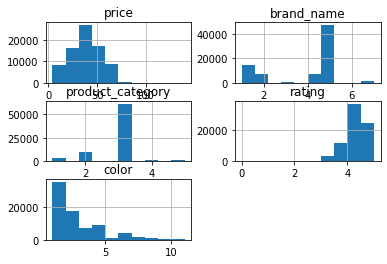

In [ ]:
dataset.hist()
pyplot.show()

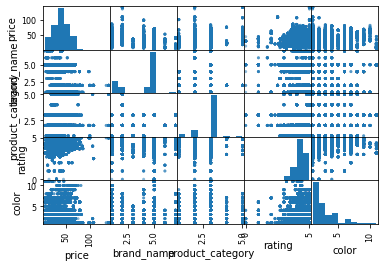

In [ ]:
scatter_matrix(dataset)
pyplot.show()

# Validation

In [ ]:
dataset.head(4)

,price,brand_name,product_category,rating,color,layouting
0,15.0,1,1,4.2,1,Second Floor
2,15.0,1,1,4.2,2,Entrance
4,18.0,1,2,3.0,1,Exit
9,15.0,1,2,4.3,1,First Floor


In [ ]:
array = dataset.values
X = array[:,0:5]
Y = array[:,5]

print(X.size)
print(Y.size)

X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(X,Y, test_size = 0.20, random_state=1)

#print(X_train.size)


388795
77759


# Modeling

In [ ]:
#Creating Models
models = []

models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma = 'auto')))

#Evaluating Models
results = []
names = []
for name,model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model,X_Train,Y_Train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.283585 (0.000048)
LDA: 0.283585 (0.000048)
KNN: 0.197775 (0.002503)
CART: 0.250615 (0.003874)
NB: 0.283344 (0.000318)


In [ ]:
#Comparing Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

NameError: ignored

# Prediction

In [ ]:
#Making Predictions
model = GaussianNB()
model.fit(X_Train, Y_Train)
predictions = model.predict(X_Validation)

#Evaluating Predictions
print(accuracy_score(Y_Validation,predictions))
print(confusion_matrix(Y_Validation,predictions))
print(classification_report(Y_Validation, predictions))

0.27732767489711935
[[   0 2195    9    0    0    0]
 [   0 4307   15    0    0    0]
 [   0 2219    6    0    0    0]
 [   0 2261    4    0    0    0]
 [   0 2259    8    0    0    0]
 [   0 2262    7    0    0    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

            Back       0.00      0.00      0.00      2204
        Entrance       0.28      1.00      0.43      4322
            Exit       0.12      0.00      0.01      2225
     First Floor       0.00      0.00      0.00      2265
Near the Cashier       0.00      0.00      0.00      2267
    Second Floor       0.00      0.00      0.00      2269

        accuracy                           0.28     15552
       macro avg       0.07      0.17      0.07     15552
    weighted avg       0.09      0.28      0.12     15552



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dataset.head(1)

,price,brand_name,product_category,rating,color,layouting
0,15.0,1,1,4.2,1,Second Floor


In [ ]:
product_price = 20.0
product_brand = 'Wacoal'
category = 'collections'
product_rating = 5.0
product_color = 'blue'

basearray = [[product_price, brand_dict[product_brand],category_dict[category],product_rating,color_dict[product_color]]]
basearray = numpy.asarray(basearray, dtype=object)
basearray.reshape(1, -1)
basearray

array([[20.0, 1, 5, 5.0, 3]], dtype=object)

In [ ]:
prediction = model.predict(basearray)
prediction

array(['Entrance'], dtype='<U16')

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
X_Validation[0]

array([34.99, 1, 3, 5.0, 9], dtype=object)

In [ ]:
dataset.shape

(77759, 6)

# Using Dummy Data from .json

In [ ]:
! mkdir dummy/
! git clone https://github.com/fadlinaufal06/project-lasti.git

mkdir: cannot create directory ‘dummy/’: File exists
fatal: destination path 'project-lasti' already exists and is not an empty directory.


In [ ]:
uploaded = files.upload()

Saving datapembelian.py to datapembelian (1).py


In [ ]:
#df1 = pandas.read_csv(r'/content/project-lasti/Data_Pembelian_Matahari.csv')
#df2 = pandas.read_json(r'/content/project-lasti/databarang.json', lines=True, orient='records')

with open('datapembelian.json') as f:
  df2 = json.load(f)

df3 = (pandas.DataFrame(df2["pembelian"]))

df4 = df3
def quantizing_column(dataset, selected_column):
  quantized_column = dataset[selected_column]
  category_dict = {}
  iterator = 1
  for item in quantized_column:
    if item not in category_dict:
      category_dict[item] = iterator
      iterator = iterator + 1
    
  return(category_dict)

def replacing_data(dataset,data_dict,replaced_column):
  for item in dataset:
    item[replaced_column] = data_dict["replaced_column"]
  return dataset

# df3 = pandas.DataFrame.from_dict(df2['pembelian'])
id = df3['ID_barang'].unique()
id

array([ 1,  2, 10,  7,  9,  5,  4,  3,  8,  6])

In [ ]:
df3 = df3.drop(['ID_pembelian','Diskon_(%)','Universal_size_(1-10)'], axis=1)
df3

,ID_barang,Warna_barang,Merek,Jenis,Harga,Rating
0,1,cream,nike,sepatu/sendal,19.000.000,"3,1"
1,2,abu-abu,adidas,sepatu/sendal,1.298.142,"3,5"
2,1,biru,nike,sepatu/sendal,19.000.000,"0,4"
3,10,cokelat,Lee,celana,335,"0,6"
4,7,cream,under armour,sepatu/sendal,1.857.759,"2,1"
5,1,cokelat,nike,sepatu/sendal,19.000.000,"2,9"
6,9,cokelat,Levis,celana,1.335.098,"1,6"
7,5,biru,The executive,baju,142.121,"1,3"
8,4,abu-abu,Hammer,baju,249.9,"3,7"
9,3,cokelat,crocs,sepatu/sendal,641.939,4


In [ ]:
def quantizing_column(dataset, selected_column):
  quantized_column = dataset[selected_column]
  category_dict = {}
  iterator = 1
  for item in quantized_column:
    if item not in category_dict:
      category_dict[item] = iterator
      iterator = iterator + 1
    
  return(category_dict)

def replacing_data(dataset,data_dict,replaced_column):
  for item in dataset:
    item[replaced_column] = data_dict["replaced_column"]
  return dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df3['Jenis'] = label_encoder.fit_transform(df3['Jenis'])
df3['Warna_barang'] = label_encoder.fit_transform(df3['Warna_barang'])
df3['Merek'] = label_encoder.fit_transform(df3['Merek'])
df3['Harga'] = df3['Harga'].str.replace(r'.','').astype(float)
df3['Rating'] = df3['Rating'].str.replace(r',','.').astype(float)
df3['Harga'] = df3['Harga'].div(1000000)
df3 = df3.dropna()

In [ ]:
df3.dtypes

ID_barang         int64
Warna_barang      int64
Merek             int64
Jenis             int64
Harga           float64
Rating          float64
dtype: object

In [ ]:
df3.iloc[3]

ID_barang       7.000000
Warna_barang    4.000000
Merek           9.000000
Jenis           2.000000
Harga           1.857759
Rating          2.100000
Name: 4, dtype: float64

In [ ]:
basearray = []
recom_dict = {}
for i, row in df3.iterrows():
  temp = [[(row['Harga']), row['Merek'],row['Jenis'],row['Rating'],row['Warna_barang']]]
  temp = numpy.asarray(temp, dtype=object)
  temp.reshape(1,-1)
  arr = model.predict(temp)
  recom_dict[row['ID_barang']] = str(arr[0])
  basearray.append(temp)
recom_dict

{1.0: 'Exit', 2.0: 'Entrance', 7.0: 'Entrance', 9.0: 'Exit'}

In [ ]:
for 

In [ ]:
basearray = [df3[], brand_dict[product_brand],category_dict[category],product_rating,color_dict[product_color]]
basearray = numpy.asarray(basearray, dtype=object)
basearray.reshape(1, -1)
basearray

SyntaxError: ignored

In [ ]:
#Category


for category in categories:
  dataset.loc[dataset['product_category'].str.casefold().str.contains(category), 'product_category'] = category
dataset = dataset[dataset['product_category'].isin(categories)]

In [ ]:
basearray = [[product_price, brand_dict[product_brand],category_dict[category],product_rating,color_dict[product_color]]]
basearray = numpy.asarray(basearray, dtype=object)
basearray.reshape(1, -1)
basearray